#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data generation

In [2]:
import csv
filename = 'Experiment.csv'
with open(filename) as csvdatei:
    csv_reader_object = csv.reader(csvdatei)
    row = list(csv_reader_object)
print('Half pole length : ', row[30])
print('Recorded data: ', row[54])

data = np.genfromtxt(filename, skip_header=55, delimiter=',')

Half pole length :  ['# L: 0.1975']
Recorded data:  ['time', 'angle', 'angleD', 'angleDD', 'angle_cos', 'angle_sin', 'position', 'positionD', 'positionDD', 'Q', 'u', 'target_position']


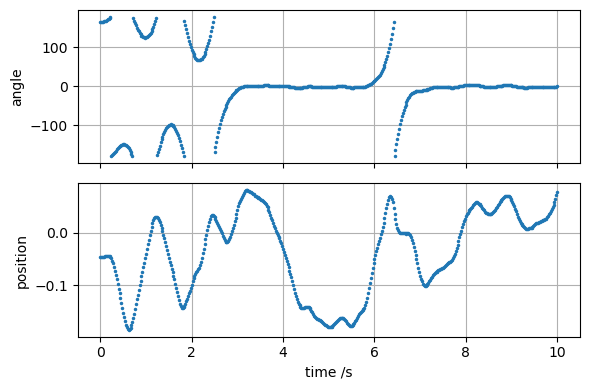

In [3]:
time = data[:,0]
angle = data[:,1]*180/np.pi
position = data[:,6]


fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi =100)
ax1.plot(time, angle,'.',markersize=3)
ax1.set(ylabel='angle')
ax1.grid(True)

ax2.plot(time, position, '.',markersize=3)
ax2.set(xlabel='time /s', ylabel='position')
ax2.grid(True)

plt.tight_layout()
